# Описание переменных:
PassengerId - уникальный идентификатор

Survived: Выживание:
1 = Выжил 
0 = Не выжил

Pclass: Класс билета

Name: полное имя с названием

Sex: пол

Age: возраст дробный, если меньше 1. Если возраст оценочный, то в виде xx.5.

Sibsp: Количество братьев и сестер / супругов на борту "Титаника". Набор данных определяет семейные отношения таким образом:
Sibling = брат, сестра, сводный брат, сводная сестра.
Spouse = муж, жена (невесты и женихи игнорируются)

Parch: Количество родителей / детей на борту "Титаника". В наборе данных семейные отношения определяются таким образом:
Родитель = мать, отец
Ребенок = дочь, сын, падчерица, пасынок.
Некоторые дети путешествовали только с няней, поэтому для них parch=0.

Ticket: Номер билета.

Fare: Тариф для пассажира.

Cabin: Номер каюты.

Embarked: Порт посадки:
  C = Шербур
  Q = Квинстаун
  S = Саутгемптон


In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
df.isna().sum()

#посмотри на количество пропущенных значений. Пока не будет их выбрасывать, при необходимости проделаем работу с ними позже

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_median       0
Age_Group        0
Special          0
dtype: int64

#  Описание данных

In [52]:
df.shape

(891, 12)

In [53]:
df ['Sex']. value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

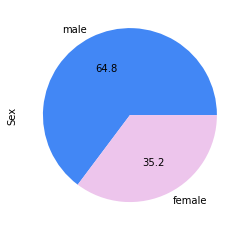

In [129]:
colors = ['#4287f5','#edc5ec']
df ['Sex']. value_counts().plot (kind = 'pie', colors = colors, autopct = '%.1f')

#### Получаем, что у нас есть информация о 891 пассажире, среди которых 577 (64,8%) человек является мужчиной, а остальные 314 женщинами (35,2%).

In [55]:
df ['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Pclass'>

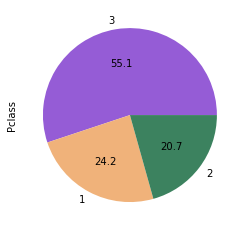

In [130]:
colors = ['#955cd6','#F0B27A', '#3c825f' ]
df ['Pclass']. value_counts().plot (kind = 'pie',colors = colors, autopct = '%.1f')

#### Самым популярным классом оказался третий класса - его приобрели 491 пассажир, что составило 55,1%. Вторым по популярности оказался первый класс - им плыли 216 пассажиров, что составило 24,2%. Второй класс оказался наименее популярным, его выбрали только 184 человека, то есть 20,7% от общего числа пассажиров.

In [57]:
df ['Age'].mean()

29.69911764705882

<AxesSubplot:>

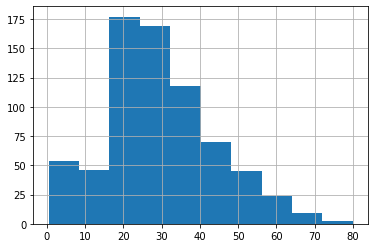

In [58]:
df ['Age'].hist()

#### По переменной возраста можно сказать, что основная часть пассажиров была возраста от 18 до 30 лет. Средний возраст пасажиров - 29 лет.

In [48]:
df ['Survived'].value_counts(dropna =False)

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

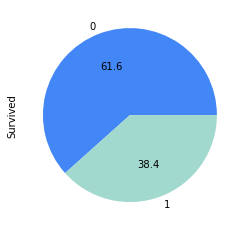

In [125]:
colors = ['#4287f5','#A2D9CE']
df ['Survived'].value_counts(dropna =False).plot (kind = 'pie',colors=colors,autopct = '%.1f')

#### Значит, что 549 человек (61,6%) пассажиров утонули, при этом выжили 342 человека, что составило 38,4% 

# Группировка данных и меры центральной тенденции

In [62]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex,Survived'>

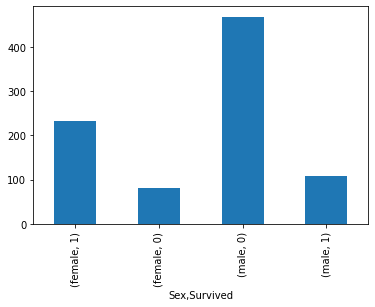

In [63]:
df.groupby('Sex')['Survived'].value_counts().plot(kind='bar')

#### Исходя из данных можно утверждать, что выживших женщин было 233, а утонувших 81. При этом, что касается мужчин, то 468 из них утонули, а 109 остались живы

In [70]:
df.groupby('Survived')['Age'].value_counts()

Survived  Age 
0         21.0    19
          28.0    18
          18.0    17
          25.0    17
          19.0    16
                  ..
1         43.0     1
          47.0     1
          53.0     1
          55.0     1
          80.0     1
Name: Age, Length: 142, dtype: int64

In [67]:
df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


#### Средний возраст выживших пассажиров составляет 28,34 года, что на 2,28 года меньше, чем средний возраст утонувших пассажиров. Самому младшему пассажиру, который утонул, был 1 год, самому же старшему утонувшему пассажиру было 74 года. Максимальный возраст выжившего пассажира - 80 лет. Можем также узнать как его звали 


In [123]:
df[df['Age'] == max(df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,80,Старше 55,0


#### Найдя данные о самом старшем выжившем пассажире, мы узнали, что его звали мистер Алджернон Генри Баркворт, которому было действительно 80 лет, который путешествовал один первым классом в каюте A23, и который сел на корабль в порту Саутгемптона

In [94]:
df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


#### Как мы уже знаем, 3 класс был самым вместительным, количесто его пассажиров оказалось равно 355 пассажиров.  Второй и первый класс разместили в себе 186 и 173 человека сообветственно. Самый молодой пассажир имеет билет 3-го класса, возраст = 0,42. Самый старший пассажир имеет билет 1-го класса, возраст = 80 лет. Средний возраст 3-го класса = 24,8, средний возраст 2-го класса = 29,5 и средний возраст 1-го класса = 39,1.

# Работа с пропущенными значениями

In [72]:
df ['Age'].median()

28.0

In [73]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())
df [df['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0


#### Заменили пропущенные значения в переменной возраста на медианные значения

# Создадим новую категориальную переменную на основе колличественной переменной "Age"

In [78]:
df = df.astype({'Age_median': 'int64'})

In [79]:
 def get_age_group_cat(age_group):
    if age_group < 18:
        return 'Младше 18'
    elif age_group < 25:
        return '18 - 25 лет'
    elif age_group < 35:
        return '26 - 35 лет'
    elif age_group < 45:
        return '36 - 45 лет'
    elif age_group < 55:
        return '46 - 55 лет'
    elif age_group >= 55:
        return 'Старше 55'
    else: 
        return age_group

In [80]:
df ['Age_Group'] = df ['Age_median'].apply(get_age_group_cat)

In [81]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22,18 - 25 лет
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,36 - 45 лет
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26,26 - 35 лет
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,36 - 45 лет
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35,36 - 45 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27,26 - 35 лет
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19,18 - 25 лет
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28,26 - 35 лет
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26,26 - 35 лет


In [82]:
df['Age_Group'].value_counts()

26 - 35 лет    378
18 - 25 лет    165
36 - 45 лет    120
Младше 18      113
46 - 55 лет     73
Старше 55       42
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

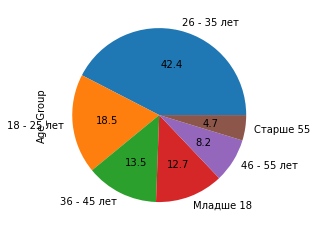

In [83]:
df ['Age_Group']. value_counts().plot (kind = 'pie', autopct = '%.1f')

#### На графике видно процентное соотношение возрастных групп. Самая большая группа как мы и предполагали - это 26-35 лет

In [92]:
# Можно также посмотреть выживаемость в разрезе каждой возрастной группы.
df.groupby('Survived')['Age_Group'].value_counts().unstack()

Age_Group,18 - 25 лет,26 - 35 лет,36 - 45 лет,46 - 55 лет,Младше 18,Старше 55
Survived,,,,,,
0,108,248,69,43,52,29
1,57,130,51,30,61,13


#### К сожалению, не существует ни одной возрастной группы, в которой количество выживших превосходило бы количество погибший.

## Посмотрим сколько людей являются женщинами в возрастной группе 18-25 лет, у которых нет детей и кто сел на корабль в порту Саутгемптон

In [114]:
df['Special'] = np.where((df['Sex'] == 'female')&
         (df ['Age_Group'] == '18 - 25 лет')& (df ['Embarked']== 'S'),1,0)

In [115]:
df['Special'].value_counts()

0    847
1     44
Name: Special, dtype: int64

#### Получается, что из всех пассажиров только 44 человека удовлетворяют это условие.

## Посмотрим на переменные для последующей z-оценки

In [134]:
df.groupby('Pclass')['Fare'].value_counts()

Pclass  Fare   
1       26.5500    15
        52.0000     7
        0.0000      5
        30.0000     5
        30.5000     5
                   ..
3       15.5500     1
        17.4000     1
        21.6792     1
        22.0250     1
        22.5250     1
Name: Fare, Length: 255, dtype: int64

In [140]:
fare_list = df['Fare']

In [145]:
Cost = []
for i in fare_list:
   Cost.append(round(i,3))
Cost

[7.25,
 71.283,
 7.925,
 53.1,
 8.05,
 8.458,
 51.862,
 21.075,
 11.133,
 30.071,
 16.7,
 26.55,
 8.05,
 31.275,
 7.854,
 16.0,
 29.125,
 13.0,
 18.0,
 7.225,
 26.0,
 13.0,
 8.029,
 35.5,
 21.075,
 31.387,
 7.225,
 263.0,
 7.879,
 7.896,
 27.721,
 146.521,
 7.75,
 10.5,
 82.171,
 52.0,
 7.229,
 8.05,
 18.0,
 11.242,
 9.475,
 21.0,
 7.896,
 41.579,
 7.879,
 8.05,
 15.5,
 7.75,
 21.679,
 17.8,
 39.688,
 7.8,
 76.729,
 26.0,
 61.979,
 35.5,
 10.5,
 7.229,
 27.75,
 46.9,
 7.229,
 80.0,
 83.475,
 27.9,
 27.721,
 15.246,
 10.5,
 8.158,
 7.925,
 8.662,
 10.5,
 46.9,
 73.5,
 14.454,
 56.496,
 7.65,
 7.896,
 8.05,
 29.0,
 12.475,
 9.0,
 9.5,
 7.787,
 47.1,
 10.5,
 15.85,
 34.375,
 8.05,
 263.0,
 8.05,
 8.05,
 7.854,
 61.175,
 20.575,
 7.25,
 8.05,
 34.654,
 63.358,
 23.0,
 26.0,
 7.896,
 7.896,
 77.287,
 8.654,
 7.925,
 7.896,
 7.65,
 7.775,
 7.896,
 24.15,
 52.0,
 14.454,
 8.05,
 9.825,
 14.458,
 7.925,
 7.75,
 21.0,
 247.521,
 31.275,
 73.5,
 8.05,
 30.071,
 13.0,
 77.287,
 11.242,
 7.75,
 7.

In [146]:
df['Cost'] = Cost
# Добавим новую колонку в датасет - округленная до тысячных стоимость билета

In [147]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22,18 - 25 лет,0,7.250
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,36 - 45 лет,0,71.283
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26,26 - 35 лет,0,7.925
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,36 - 45 лет,0,53.100
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35,36 - 45 лет,0,8.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27,26 - 35 лет,0,13.000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19,18 - 25 лет,1,30.000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28,26 - 35 лет,0,23.450
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26,26 - 35 лет,0,30.000


# Z-оценка

<AxesSubplot:>

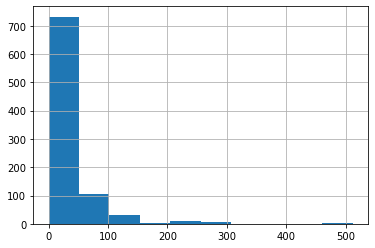

In [162]:
df['Cost'].hist()

In [166]:
import scipy.stats

In [167]:
df ['z_score'] = scipy.stats.zscore(df['Cost'])

In [168]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22,18 - 25 лет,0,7.250,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,36 - 45 лет,0,71.283,0.786839
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26,26 - 35 лет,0,7.925,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,36 - 45 лет,0,53.100,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35,36 - 45 лет,0,8.050,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27,26 - 35 лет,0,13.000,-0.386671
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19,18 - 25 лет,1,30.000,-0.044381
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28,26 - 35 лет,0,23.450,-0.176263
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26,26 - 35 лет,0,30.000,-0.044381


<AxesSubplot:>

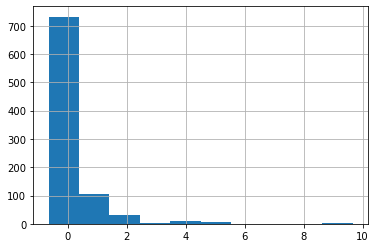

In [170]:
df['z_score'].hist()

In [177]:
df[df['z_score']< -3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score


#### Нет ни одного пассажира, стоимость билета которого была бы распределена дальше, чем три стандартных отклонения от среднего значения

# Пивотальная таблица с мерами центральной тенденции

In [149]:
df.pivot_table(index = 'Pclass', values = ['Cost'], aggfunc = ['mean', 'median', 'min', 'max'])

,mean,median,min,max
,Cost,Cost,Cost,Cost
Pclass,,,,
1,84.154667,60.2875,0.0,512.329
2,20.662185,14.2500,0.0,73.500
3,13.675546,8.0500,0.0,69.550


# Рассчет дисперсии и среднеквадратичного отклонения

In [207]:
# отдельно рассмотрим каждый класс кают 
class1 = df[df['Pclass'] == 1]
class2 = df[df['Pclass'] == 2]
class3 = df[df['Pclass'] == 3]

In [208]:
class1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,36 - 45 лет,0,71.283,0.786839
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,36 - 45 лет,0,53.100,0.420730
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54,46 - 55 лет,0,51.862,0.395804
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,58,Старше 55,0,26.550,-0.113846
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,28,26 - 35 лет,0,35.500,0.066360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,47,46 - 55 лет,0,52.554,0.409737
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,33,26 - 35 лет,0,5.000,-0.547748
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,56,Старше 55,0,83.158,1.025939
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19,18 - 25 лет,1,30.000,-0.044381


In [209]:
class1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_median,Special,Cost,z_score
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,36.805556,0.041667,84.154667,1.046006
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,14.191683,0.200290,78.380381,1.578164
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.648421
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950,28.000000,0.000000,30.924000,-0.025776
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500,35.000000,0.000000,60.287500,0.565448
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000,47.250000,0.000000,93.500000,1.234172
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,80.000000,1.000000,512.329000,9.667162


#### Исходя из описания, мы понимаем, что человек, который приобрел билет по цене 0 является младенцем, поэтому стоит отфильтровать данные дополнительно по возрасту, что бы взять только платежеспособную аудиторию

In [210]:
class1_age = df[(df['Pclass'] == 1) & (df['Age'] >= 18)]

In [211]:
class1_age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_median,Special,Cost,z_score
count,174.000000,174.000000,174.0,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,459.701149,0.637931,1.0,40.031609,0.448276,0.350575,86.574115,40.028736,0.051724,86.574092,1.094721
std,248.810191,0.481986,0.0,13.471030,0.640784,0.686850,82.538947,13.469910,0.222109,82.538956,1.661896
min,2.000000,0.000000,1.0,18.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,-0.648421
25%,263.250000,0.000000,1.0,30.000000,0.000000,0.000000,31.330200,30.000000,0.000000,31.330250,-0.017597
50%,486.000000,1.000000,1.0,38.000000,0.000000,0.000000,64.979150,38.000000,0.000000,64.979000,0.659910
75%,662.500000,1.000000,1.0,49.750000,1.000000,0.000000,91.079200,49.750000,0.000000,91.079000,1.185426
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,80.000000,1.000000,512.329000,9.667162


#### мы видим, что в этой выборке также есть как минимум 1 человек, который ничего не заплатил за билет, однако ему уже есть 18 лет. Скорее всего за него заплатил кто-то другой. Поэтому вернемся к первоначальному варианту и будем считать разбросы уже по класса, определенным выше

In [214]:
#Размах 
class1['Cost'].max() - class1['Cost'].min()

512.329

In [215]:
#Интерквартильный размах 
np.percentile(class1['Cost'],75) - np.percentile(class1['Cost'],25)

62.576

In [216]:
#Cреднее
class1_mean = class1['Cost'].mean()
print (class1_mean)

84.15466666666656


In [218]:
#Отклонение
deviations = class1['Cost'] - class1_mean
print (deviations)

1     -12.871667
3     -31.054667
6     -32.292667
11    -57.604667
23    -48.654667
         ...    
871   -31.600667
872   -79.154667
879    -0.996667
887   -54.154667
889   -54.154667
Name: Cost, Length: 216, dtype: float64


In [219]:
#Oтклонения в квадрате
sq_deviations =deviations**2
print(sq_deviations)

1       165.679803
3       964.392322
6      1042.816320
11     3318.297622
23     2367.276588
          ...     
871     998.602134
872    6265.461255
879       0.993344
887    2932.727922
889    2932.727922
Name: Cost, Length: 216, dtype: float64


In [220]:
#Дисперсия (для выборки)

varience_sam = sq_deviations.sum()/(len(class1) - 1)
print(varience_sam)

6143.4840919906965


In [221]:
#Ср.квадратичное отклонение (для выборки)

std_samp = np.sqrt(varience_sam)
print (std_samp)

78.38038078493047


In [222]:
# Проверим через функции pd дисперсия и ср. квадротичное отклон (для выборки)
print (class1['Cost'].var())
print (class1['Cost'].std())

6143.484091990696
78.38038078493045


#### Так как первую переменную мы рассчитали вручную пошагово, для остальных двух будем рассчитывать через функции Pandas

In [225]:
class2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14,Младше 18,0,30.071,-0.042951
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,55,Старше 55,0,16.000,-0.326267
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28,26 - 35 лет,0,13.000,-0.386671
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,35,36 - 45 лет,0,26.000,-0.124920
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,34,26 - 35 лет,0,13.000,-0.386671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,27,26 - 35 лет,0,13.858,-0.369395
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,28,26 - 35 лет,0,24.000,-0.165189
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,25,26 - 35 лет,0,26.000,-0.124920
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,28,26 - 35 лет,0,10.500,-0.437007


In [226]:
print (class2['Cost'].var())
print (class2['Cost'].std())

180.02638769244476
13.417391240194375


In [227]:
class3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22,18 - 25 лет,0,7.250,-0.502445
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26,26 - 35 лет,0,7.925,-0.488854
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35,36 - 45 лет,0,8.050,-0.486337
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28,26 - 35 лет,0,8.458,-0.478122
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2,Младше 18,0,21.075,-0.224083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,22,18 - 25 лет,1,10.517,-0.436665
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,25,26 - 35 лет,0,7.050,-0.506472
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,39,36 - 45 лет,0,29.125,-0.061999
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28,26 - 35 лет,0,23.450,-0.176263


In [238]:
print (class2['Cost'].var())
print (class2['Cost'].std())

180.02638769244476
13.417391240194375


# Выбросы

#### Найдем выбросы для каждого класса для 1 и 2 классов определим выбросы через среднеквадратичное отклонение, а для 3 класса используем другой способ - через межквартильный размах

In [252]:
# для начала исследуем первый класс кают 
mean_1 = class1['Cost'].mean()
std_1 = class1['Cost'].std()
std_threshold_bottom_1 = mean_1 - 2.5 * std_1
std_threshold_top_1 = mean_1 + 2.5 * std_1
print (std_threshold_bottom_1, std_threshold_top_1)

-111.79628529565959 280.1056186289927


In [254]:
class1[class1['Cost'] > std_threshold_top_1].shape

(3, 17)

In [255]:
class1[class1['Cost'] > std_threshold_top_1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,35,36 - 45 лет,0,512.329,5.475464
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,36,36 - 45 лет,0,512.329,5.475464
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,35,36 - 45 лет,0,512.329,5.475464


#### Выбросов в первом классе кают оказалось 3. 
#### Они представлены ниже. Скорее всего это самые дорогие каюты самого большого размера, судя по переменной "Cabin", они располагались на этаже В.

<AxesSubplot:>

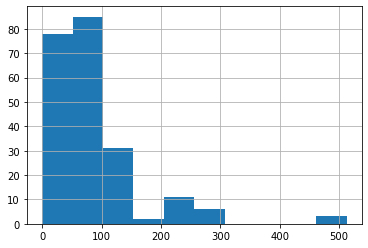

In [261]:
class1['Cost'].hist()

In [257]:
# теперь исследуем второй класс кают на предмет выбросов
mean_2 = class2['Cost'].mean()
std_2 = class2['Cost'].std()
std_threshold_bottom_2 = mean_2 - 2.5 * std_2
std_threshold_top_2 = mean_2 + 2.5 * std_2
print (std_threshold_bottom_2, std_threshold_top_2)

-12.881293317877237 54.20566288309463


In [258]:
class2[class2['Cost'] > std_threshold_top_2].shape

(7, 17)

#### выбросов во втором классе оказалось чуть больше - 7. Такую же картину можно наблюдать и на гистограмме.

In [259]:
class2[class2['Cost'] > std_threshold_top_2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S,21,18 - 25 лет,0,73.5,0.831478
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,NaN,S,21,18 - 25 лет,0,73.5,0.831478
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S,18,18 - 25 лет,0,73.5,0.831478
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,NaN,S,24,18 - 25 лет,1,65.0,0.660333
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S,24,18 - 25 лет,0,73.5,0.831478
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,NaN,S,32,26 - 35 лет,0,73.5,0.831478
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,NaN,S,48,46 - 55 лет,0,65.0,0.660333


<AxesSubplot:>

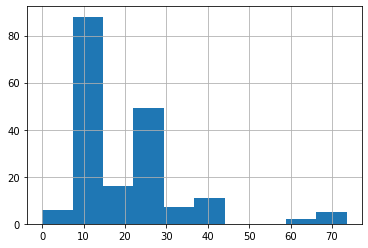

In [275]:
class2['Cost'].hist()

In [265]:
# наконец, найдем выбросы для 3 класса кают 
q3 = np.percentile(class3['Cost'],75)
q1 = np.percentile(class3['Cost'],25)
print (q3,q1)

15.5 7.75


In [264]:
iqr = q3 -q1
print(iqr)

7.75


In [266]:
iqr_threshold_bottom_3 = q1 - 1.5 * iqr
iqr_threshold_top_3 = q3 + 1.5 * iqr
print (iqr_threshold_bottom_3, iqr_threshold_top_3)

-3.875 27.125


In [276]:
class3[class3['Cost'] > iqr_threshold_top_3].shape

(52, 17)

#### В третьем классе самое большое число выбросов - 52. Как показано на гистограмме большинство пассажиров приобретали свои билеты по цене от 9,000 до 15,000.

In [268]:
class3[class3['Cost'] > iqr_threshold_top_3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,39,36 - 45 лет,0,31.275,-0.018709
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,2,Младше 18,0,29.125,-0.061999
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,38,36 - 45 лет,0,31.387,-0.016454
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,7,Младше 18,0,39.688,0.150684
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,11,Младше 18,0,46.900,0.295895
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,4,Младше 18,0,27.900,-0.086664
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,16,Младше 18,0,46.900,0.295895
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,32,26 - 35 лет,0,56.496,0.489108
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S,16,Младше 18,0,34.375,0.043708
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,2,Младше 18,0,31.275,-0.018709


<AxesSubplot:>

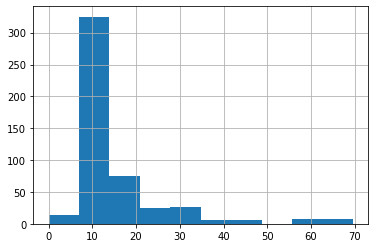

In [274]:
class3 ['Cost'].hist()

# Корреляции

In [282]:
# перекодируем переменную "Sex" в бинарную, что бы получить еще одну корреляцию

df ['Sex_new'] = df['Sex']. apply(lambda x: 1 if x == 'female' else 0)
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Group,Special,Cost,z_score,Sex_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22,18 - 25 лет,0,7.250,-0.502445,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,36 - 45 лет,0,71.283,0.786839,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26,26 - 35 лет,0,7.925,-0.488854,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,36 - 45 лет,0,53.100,0.420730,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35,36 - 45 лет,0,8.050,-0.486337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27,26 - 35 лет,0,13.000,-0.386671,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19,18 - 25 лет,1,30.000,-0.044381,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28,26 - 35 лет,0,23.450,-0.176263,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26,26 - 35 лет,0,30.000,-0.044381,0


In [283]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_median,Special,Cost,z_score,Sex_new
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.034322,-0.018850,0.012658,0.012658,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.064909,0.160956,0.257306,0.257306,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.339999,-0.003597,-0.549499,-0.549499,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.999973,-0.149959,0.096067,0.096067,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.233066,0.004642,0.159651,0.159651,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.172745,0.059219,0.216225,0.216225,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.096838,0.015568,1.000000,1.000000,0.182333
Age_median,0.034322,-0.064909,-0.339999,0.999973,-0.233066,-0.172745,0.096838,1.000000,-0.142504,0.096838,0.096838,-0.080750
Special,-0.018850,0.160956,-0.003597,-0.149959,0.004642,0.059219,0.015568,-0.142504,1.000000,0.015568,0.015568,0.308964
Cost,0.012658,0.257306,-0.549499,0.096067,0.159651,0.216225,1.000000,0.096838,0.015568,1.000000,1.000000,0.182333


In [289]:
#Для удобства отберем только несколько переменных,которые нас действительно интересуют для поиска корреляций
C_class = df.groupby(df['PassengerId'])['Pclass'].mean()
C_age = df.groupby(df['PassengerId'])['Age'].mean()
C_cost = df.groupby(df['PassengerId'])['Cost'].mean()
C_sex = df.groupby(df['PassengerId'])['Sex_new'].mean()
C_surv = df.groupby(df['PassengerId'])['Survived'].mean()

In [290]:
df_corr = pd.concat ([C_class,C_age,C_cost,C_sex,C_surv], axis = 1)

In [310]:
df_1 =df_corr.corr()

In [311]:
df_1

,Pclass,Age,Cost,Sex_new,Survived
Pclass,1.000000,-0.369226,-0.549499,-0.131900,-0.338481
Age,-0.369226,1.000000,0.096067,-0.093254,-0.077221
Cost,-0.549499,0.096067,1.000000,0.182333,0.257306
Sex_new,-0.131900,-0.093254,0.182333,1.000000,0.543351
Survived,-0.338481,-0.077221,0.257306,0.543351,1.000000


In [312]:
df_1.abs().unstack().sort_values(ascending = False)

Pclass    Pclass      1.000000
Age       Age         1.000000
Sex_new   Sex_new     1.000000
Cost      Cost        1.000000
Survived  Survived    1.000000
Pclass    Cost        0.549499
Cost      Pclass      0.549499
Survived  Sex_new     0.543351
Sex_new   Survived    0.543351
Pclass    Age         0.369226
Age       Pclass      0.369226
Survived  Pclass      0.338481
Pclass    Survived    0.338481
Survived  Cost        0.257306
Cost      Survived    0.257306
          Sex_new     0.182333
Sex_new   Cost        0.182333
          Pclass      0.131900
Pclass    Sex_new     0.131900
Cost      Age         0.096067
Age       Cost        0.096067
Sex_new   Age         0.093254
Age       Sex_new     0.093254
          Survived    0.077221
Survived  Age         0.077221
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Cost'>

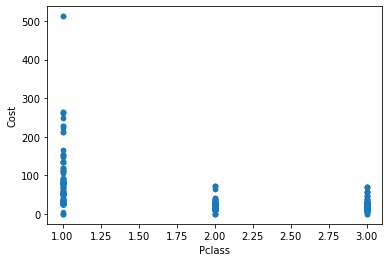

In [313]:
#связь между всеми переменными достаточно низкая.
#Наибольшую корреляцию (0.549499) показывают переменные "Pclass" и "Cost". Построим их график рассеивания ниже  
df_corr.plot('Pclass', 'Cost', kind = 'scatter')

<AxesSubplot:xlabel='Age', ylabel='Cost'>

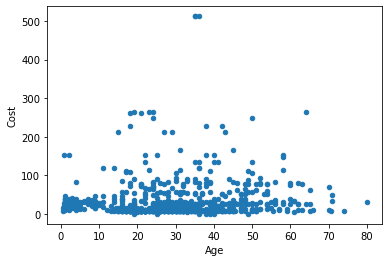

In [307]:
# построим еще один график рассеивания для поиска связи
рdf_corr.plot('Age', 'Cost', kind = 'scatter')

#### можно сказать, что связи между переменными возраста и стоимости билета практически нет

# Продвинутая визуализация данных
### Так как в ходе работы уже была применена базовая визуализация, в этом разделе рассмотрим более сложные графики для повышенной оценки

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/zhenya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

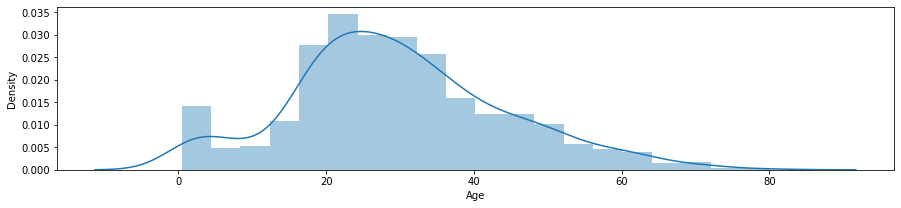

In [349]:
#Построим гистограмму для переменной возраста с линией ядерной оценки плотности
plt.figure(figsize=(15, 3))
sns.distplot(df['Age'])

#### Как мы видим, выводы по гистограмме совпадают с собранной ранее информацией о распределениее возрастов пассажиров

In [341]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

([<matplotlib.axis.XTick at 0x7fe774812fa0>,
 [Text(0, 0, 'Погибли'), Text(1, 0, 'Выжили')])

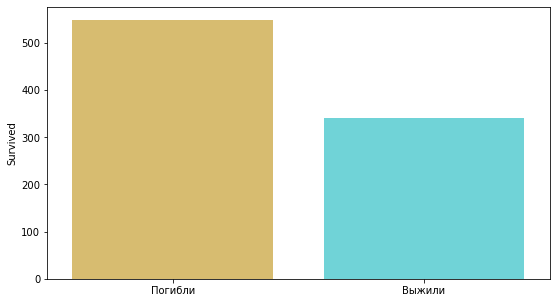

In [383]:
#рассмотрим на столбчатой диаграмме бинарную переменную 'Survived' и переименнуем столбцы в соответствии с ответами


#зададим размер графика
plt.figure(figsize=(9, 5))
#построим столбчатую диаграмму
sns.barplot(x = df['Survived'].value_counts().index, y= df['Survived'].value_counts(), 
            palette=['#e8c45f', "#5fe3e8"])
#подпишем значения столбцов
plt.xticks( np.arange(2), ['Погибли', 'Выжили'] )

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

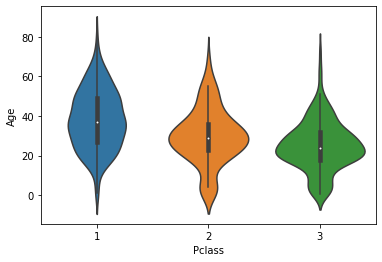

In [379]:
#применим график виолончели, чтобы посмотреть распределение возраста по 3 различным классам кают 
sns.violinplot(x= df['Pclass'], y = df['Age'])

#### На графиках видно, что распределение первого класса более равномерное
#### Возраст второго класса смещен к более молодому возрасту, имеет пик на отметке 30 лет
#### Третий класс также смещен к более молодому возрасту, имеет пик в 25 лет

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

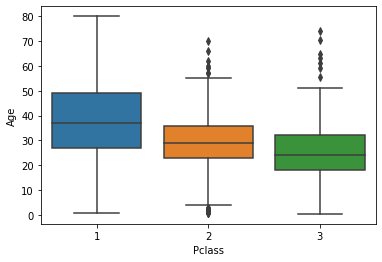

In [354]:
sns.boxplot (x= df['Pclass'], y = df['Age'])
# Применим ящик с усами, чтобы посмотреть есть ли выбросы в данных переменных.

#### У первого класса в распределении по возрастам выбросов нет
#### У второго и третьего класса присутствует некоторое количество выбросов

### Построим еще комбинированный граффик - ящик с усами и график рассеивания на одном графике для переменных 'Survived' и 'Age' . Таким образом мы увидим распределение возрастов выживших и погибших, а также посмотрим на выбросы для каждой группы

([<matplotlib.axis.YTick at 0x7fe781b860d0>,
 [Text(0, 0, 'Погибли'), Text(0, 1, 'Выжили')])

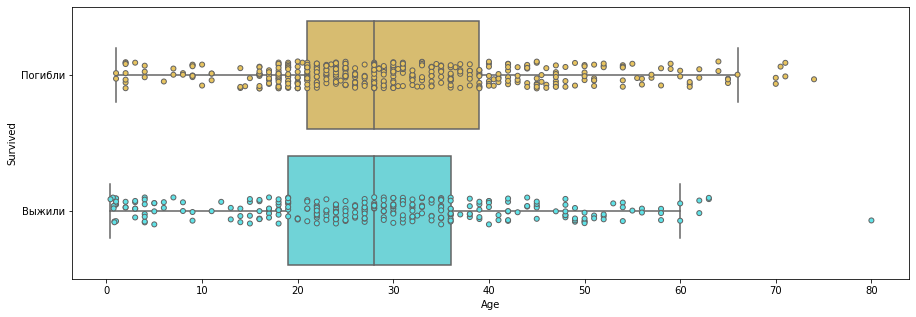

In [378]:
plt.figure(figsize=(15, 5))

# Сначала создадим ящик с усами для того, чтобы посмотреть распределение возраста погибших и выживших
sns.boxplot(y = 'Survived', x = 'Age', data = df,
     palette=['#e8c45f', '#5fe3e8'], fliersize = 0, orient = 'h')

# Добавим график рассеиваниядля каждой группы
sns.stripplot(y = 'Survived', x = 'Age', data = df,
     linewidth = 1, palette=['#e8c45f', '#5fe3e8'], orient = 'h')

plt.yticks( np.arange(2), ['Погибли', 'Выжили'])

#### Как мы видим для обеих характерно смещение в сторону более молодого возраста, для группы выживших это смещение более явное. Выбросы также присущи для обеих групп, но у группы утонувших пассажиров таких значений больше. 